# Program information :

* Data is assumed to be stored in './data' folder specified by file_folder parameter.
* Expected file runtime : 1 min.
* The following files are stored to the root directory:-
    * Datasets.csv : Contains dataset information.
    * Groups.csv : Contains groups information.
    * Image.png : Contains final inage.

# Preliminary

In [1]:
# IMPORTING LIBRARIES

import os
import h5py

import pytz
import datetime

import numpy as np
import pandas as pd
import scipy.signal

import matplotlib.pyplot as plt

In [2]:
# IMPORTING THE FILE

file_folder = 'data'
file_location = os.path.join(os.getcwd(),'data')
file_list = os.listdir(file_location)

file = file_list[0]
file_path = os.path.join(file_location,file)

print("File : " +  file)

File : 1541962108935000000_167_838.h5


# Time Conversion

In [3]:
# Getting raw UNIX time
raw_time = int(file.split('_')[0])/1e9

# Function to format time
def format_time(time_dt):
    '''
    Converts datetime object to formatted date and time.
    '''
    
    dt_format = '%Y-%m-%d %H:%M:%S'
    
    time = time_dt.strftime(dt_format)
    return time

In [4]:
# UTC TIME

# Converting UNIX time to UTC datetime object
utc_time_dt =  datetime.datetime.utcfromtimestamp(raw_time)

# Getting formatted UTC date-time
utc_time = format_time(utc_time_dt)
print("UTC Time : " + utc_time)

UTC Time : 2018-11-11 18:48:28


In [5]:
# CERN TIME

# Converting UTC datetime to CERN datetime object
cern = pytz.timezone('Europe/Zurich')
cern_time_dt = pytz.utc.localize(utc_time_dt).astimezone(cern)

# Getting formatted CERN date-time
cern_time = format_time(cern_time_dt)
print("CERN Time : " + cern_time)

CERN Time : 2018-11-11 19:48:28


# Exploring the File

NOTE : I have created two .csv files, one each for groups and datasets.

In [6]:
# IMPORTING THE FILE

file = h5py.File(file_path,'r')

# Printing file keys
print(list(file.keys()))

['AwakeEventData', 'AwakeEventInfo', '__DATA_TYPES__']


In [7]:
# CREATING PANDAS DATAFRAMES TO STORE OBJECT DATA

dataset_df = pd.DataFrame(columns = ['Name','Size','Shape','Dtype'])
group_df = pd.DataFrame(columns = ['Name'])

In [8]:
# DEFINING UPDATE FUNCTIONS

# For 'datasets'.
def update_dataset_df(dataset_name):    
    
    '''
    Updates 'dataset_df' by adding another row that 
    contains data related to 'dataset_name'
    '''
    
    dataset = file.get(dataset_name)
    dataset_size = dataset.size
    dataset_shape = dataset.shape
    
    try:
        dataset_dtype = dataset.dtype
    except:
        dataset_dtype = 'NULL'
    
    # Append a row to 'dataset_df' dataframe 
    dataset_df.loc[len(dataset_df)+1] = [dataset_name,dataset_size,dataset_shape,dataset_dtype]
    

# For 'groups'
def update_group_df(group_name):
    '''
    Updates 'group_df' by adding another row that 
    contains data related to 'group_name'
    '''
    
    # Append a row to 'group_df' dataframe 
    group_df.loc[len(group_df)+1] = [group_name]

In [9]:
# Get list of groups, datasets.

def update(name, obj):
    '''
    Updates dataset and group dataframes by adding a row
    when appropriate object is detected
    '''
    
    # For dataset
    if isinstance(obj, h5py.Dataset):
        update_dataset_df(name)        
        
    # For group
    if isinstance(obj, h5py.Group):
        update_group_df(name)
        
# Recursively visit all objects in file
file.visititems(update)

In [10]:
# DATASETS

# Exporting to .csv
dataset_df.to_csv("Datasets.csv")

print("Total Datasets : ", len(dataset_df))
dataset_df.head(10)

Total Datasets :  1603


,Name,Size,Shape,Dtype
1,AwakeEventData/AIRTR01/Acq/numericPosition,1,"(1,)",float32
2,AwakeEventData/AIRTR02/Acq/numericPosition,1,"(1,)",float32
3,AwakeEventData/AWAKEInjPhaseShifter/PhaseReadb...,1,"(1,)",float32
4,AwakeEventData/BLMITT41/Acquisition/acqDesc,1,"(1,)",|S1
5,AwakeEventData/BLMITT41/Acquisition/acqMsg,1,"(1,)",|S1
6,AwakeEventData/BLMITT41/Acquisition/acqState,1,"(1,)",int32
7,AwakeEventData/BLMITT41/Acquisition/acqTime,1,"(1,)",int32
8,AwakeEventData/BLMITT41/Acquisition/alarmStatus,40,"(40,)",int16
9,AwakeEventData/BLMITT41/Acquisition/blrSignalS...,40,"(40,)",int16
10,AwakeEventData/BLMITT41/Acquisition/calLosses,40,"(40,)",float32


In [11]:
# GROUPS

# Exporting to .csv
group_df.to_csv("Groups.csv")

print("Total Groups : ", len(group_df))
group_df.head(10)

Total Groups :  409


,Name
1,AwakeEventData
2,AwakeEventData/AIRTR01
3,AwakeEventData/AIRTR01/Acq
4,AwakeEventData/AIRTR02
5,AwakeEventData/AIRTR02/Acq
6,AwakeEventData/AWAKEInjPhaseShifter
7,AwakeEventData/AWAKEInjPhaseShifter/PhaseReadback
8,AwakeEventData/BLMITT41
9,AwakeEventData/BLMITT41/Acquisition
10,AwakeEventData/BOVWA.01TCC4.AWAKECAM01


# Image processing 

In [12]:
# IMPORTING DATASET

data_name = "AwakeEventData/XMPP-STREAK/StreakImage"
data_group = file[data_name]

# Exploring data
for dataset in data_group.__iter__():
    print(dataset)

streakImageBinning
streakImageData
streakImageExposureTime
streakImageHeight
streakImageInfo
streakImageMcpGain
streakImageMode
streakImageProjection
streakImageTime
streakImageTimeRange
streakImageTimeValues
streakImageTrigLevel
streakImageWidth


In [13]:
# GETTING 2D IMAGE DIMENSIONS

# Getting the data
data = data_group['streakImageData']

# Getting width
width = int(data_group['streakImageWidth'][0])
print("Width  : ", width)

# Getting height
height = int(data_group['streakImageHeight'][0])
print("Height : ",height)

# Getting 1-d array length
size = int(data.len())
print("1D length : ", size)

# Checking if dimensions mathch
assert(width*height == size)

Width  :  672
Height :  512
1D length :  344064


In [14]:
# CONVERTING TO FORMATTED 2D IMAGE

# Converting to numpy array
img_data = np.array(data)

# Reshaping into 2D array
img_data = img_data.reshape(height,width)

# Filtering the image
img_data = scipy.signal.medfilt(img_data)

print(img_data)

[[  0. 405. 407. ... 404. 404.   0.]
 [408. 412. 412. ... 410. 408. 404.]
 [406. 412. 409. ... 407. 406. 404.]
 ...
 [406. 410. 410. ... 411. 414. 411.]
 [411. 411. 411. ... 411. 411. 411.]
 [  0. 406. 406. ... 403. 403.   0.]]


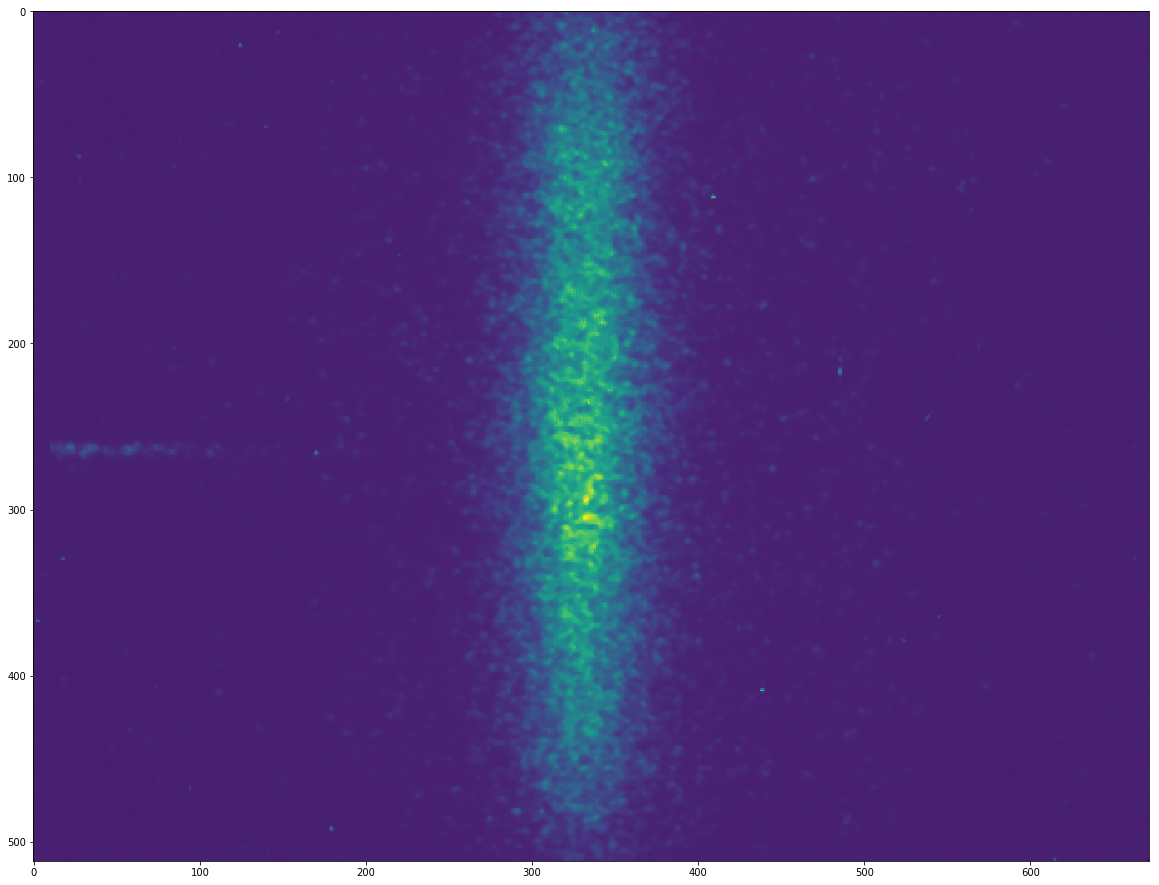

In [15]:
# IMAGE PLOTTING

# Defining the image plotting function
def plot_img(img_data,figsize=(20,20), name='Image.png',dpi=300):
    '''
    Plots the image given by 'img_data'.
    Takes 'figsze', 'name' and 'dpi' as optional parameters.
    Image is stored in root directory with default name 'Image.png'.
    '''
    
    fig = plt.figure(figsize=figsize)

    img = plt.imshow(img_data)
    plt.savefig(name,dpi=dpi)
    plt.show()
    
# Plotting the image 
plot_img(img_data)